In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
                                                                                                                                    

warnings.filterwarnings("ignore")

In [2]:
#reading the dataset
data=pd.read_csv("T1.csv")

In [3]:
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
data.shape

(50530, 5)

In [5]:
data.dtypes

Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object

In [6]:
data.isna()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
50525,False,False,False,False,False
50526,False,False,False,False,False
50527,False,False,False,False,False
50528,False,False,False,False,False


In [7]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [8]:
#there is no null values in the dataset provided

In [9]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [10]:
#we see in the active power there is a negative value
count_negative_values = (data['LV ActivePower (kW)'] < 0).sum()
count_negative_values

57

In [11]:
#so we changed all the negative values to 0 for better preprocessing
data.loc[data['LV ActivePower (kW)'] < 0, 'LV ActivePower (kW)'] = 0

In [12]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684699,7.557952,1492.175463,123.687559
std,1312.458876,4.227166,1368.018238,93.443736
min,0.000000,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [13]:
#extracting the date time as spearate features for better evaluation of models
data['Date/Time']=pd.to_datetime(data['Date/Time'],format='%d %m %Y %H:%M')

In [14]:
data['Week']=data['Date/Time'].dt.day // 7 + 1

data['Week'].value_counts()

Week
3    11948
4    11809
2    11645
1     9924
5     5204
Name: count, dtype: int64

In [15]:
data['Month']=data['Date/Time'].dt.month

In [16]:
seasons_dict = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
data['Seasons'] = data['Month'].map(seasons_dict)

In [17]:
data['Day']=data['Date/Time'].dt.day

In [18]:
data['Hour']=data['Date/Time'].dt.hour+1

In [19]:
#drpp the date/time column as we have extracted all the features from it already
data.drop(columns=['Date/Time'],inplace=True) 

In [20]:
data.isna().sum()

LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
Week                             0
Month                            0
Seasons                          0
Day                              0
Hour                             0
dtype: int64

In [21]:
data.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Week,Month,Seasons,Day,Hour
0,380.047791,5.311336,416.328908,259.994904,1,1,Winter,1,1
1,453.769196,5.672167,519.917511,268.641113,1,1,Winter,1,1
2,306.376587,5.216037,390.900016,272.564789,1,1,Winter,1,1
3,419.645905,5.659674,516.127569,271.258087,1,1,Winter,1,1
4,380.650696,5.577941,491.702972,265.674286,1,1,Winter,1,1


In [22]:
#visualising data

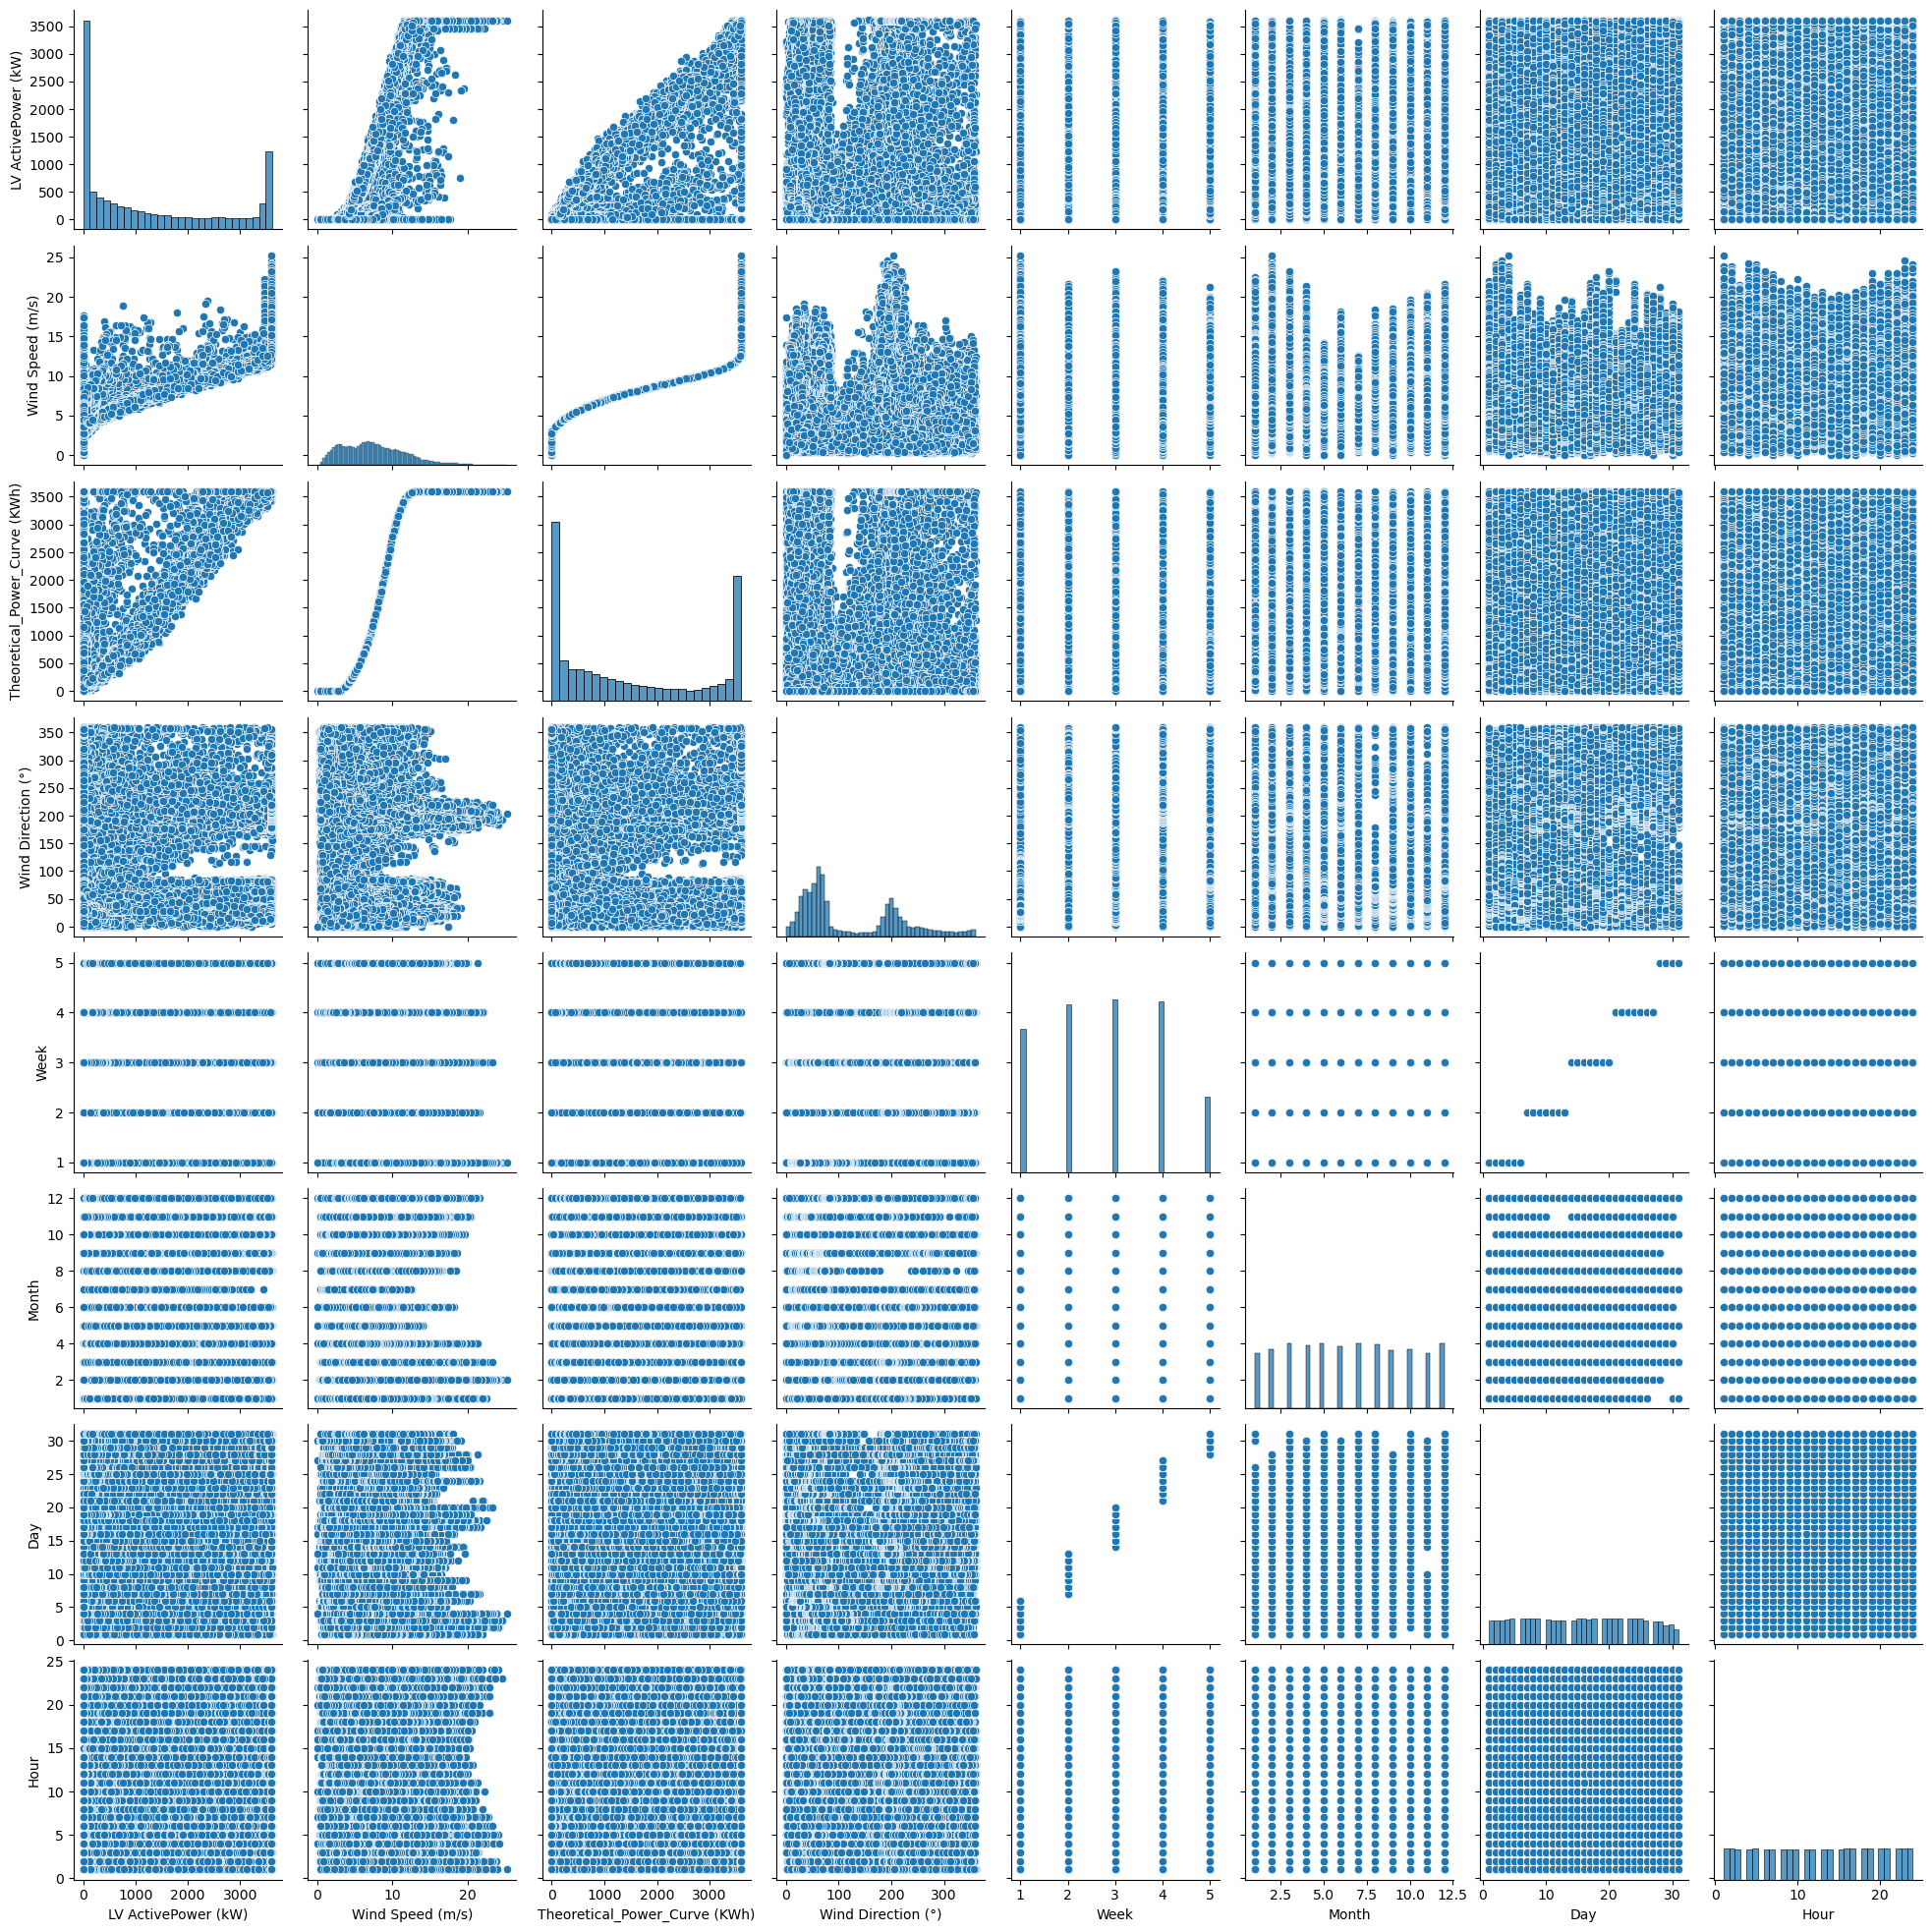

In [23]:
sns.pairplot(data)

In [24]:
#Encoding=Converting Categorical Column to Numerical Column
from sklearn.preprocessing import LabelEncoder

In [25]:
#initialise the LabelEncode
le=LabelEncoder()

In [26]:
data['Seasons']=le.fit_transform(data['Seasons'])

In [27]:
data.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Week,Month,Seasons,Day,Hour
0,380.047791,5.311336,416.328908,259.994904,1,1,3,1,1
1,453.769196,5.672167,519.917511,268.641113,1,1,3,1,1
2,306.376587,5.216037,390.900016,272.564789,1,1,3,1,1
3,419.645905,5.659674,516.127569,271.258087,1,1,3,1,1
4,380.650696,5.577941,491.702972,265.674286,1,1,3,1,1


In [28]:
data.dtypes

LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
Week                               int32
Month                              int32
Seasons                            int32
Day                                int32
Hour                               int32
dtype: object

In [29]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [30]:
#printing the correlation of features with each other
corr=data.corr()

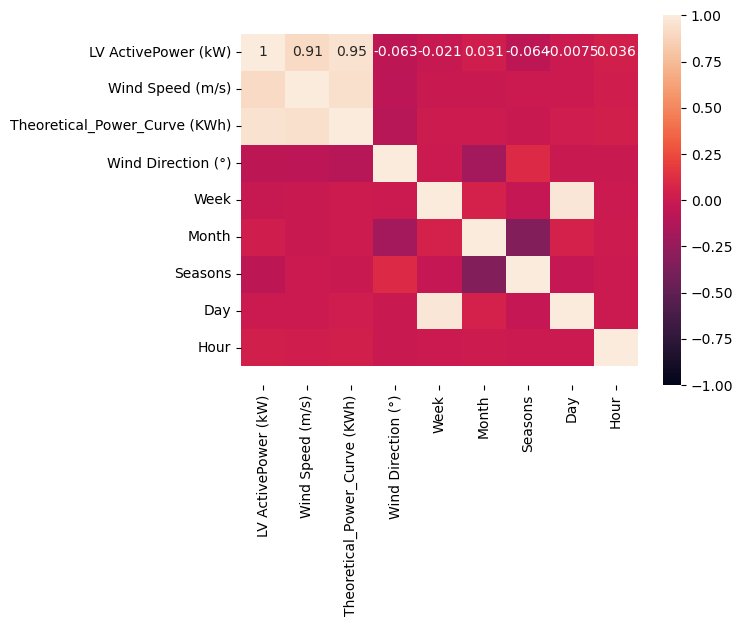

In [31]:
ax=sns.heatmap(corr,vmin=-1,vmax=1,annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [32]:
print(corr)

                               LV ActivePower (kW)  Wind Speed (m/s)  \
LV ActivePower (kW)                       1.000000          0.912774   
Wind Speed (m/s)                          0.912774          1.000000   
Theoretical_Power_Curve (KWh)             0.949918          0.944209   
Wind Direction (°)                       -0.062702         -0.077188   
Week                                     -0.020632         -0.011336   
Month                                     0.031010         -0.013349   
Seasons                                  -0.063588         -0.006270   
Day                                      -0.007530         -0.000058   
Hour                                      0.036356          0.024754   

                               Theoretical_Power_Curve (KWh)  \
LV ActivePower (kW)                                 0.949918   
Wind Speed (m/s)                                    0.944209   
Theoretical_Power_Curve (KWh)                       1.000000   
Wind Direction (°)     

In [33]:
#we see wind direction has negative correlation with all other factors so we can drop it

In [34]:
data.drop(['Wind Direction (°)'],axis=1,inplace=True)

In [35]:
data.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Week,Month,Seasons,Day,Hour
0,380.047791,5.311336,416.328908,1,1,3,1,1
1,453.769196,5.672167,519.917511,1,1,3,1,1
2,306.376587,5.216037,390.900016,1,1,3,1,1
3,419.645905,5.659674,516.127569,1,1,3,1,1
4,380.650696,5.577941,491.702972,1,1,3,1,1


In [36]:
data.tail()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Week,Month,Seasons,Day,Hour
50525,2963.980957,11.404030,3397.190793,5,12,3,31,24
50526,1684.353027,7.332648,1173.055771,5,12,3,31,24
50527,2201.106934,8.435358,1788.284755,5,12,3,31,24
50528,2515.694092,9.421366,2418.382503,5,12,3,31,24
50529,2820.466064,9.979332,2779.184096,5,12,3,31,24


In [37]:
#splitting into dependent and independent variables

In [38]:
y=data['LV ActivePower (kW)']

In [39]:
x=data[['Theoretical_Power_Curve (KWh)','Wind Speed (m/s)','Month','Day','Hour']]	

In [40]:
x.shape

(50530, 5)

In [41]:
y.shape

(50530,)

In [42]:
y.head()

0    380.047791
1    453.769196
2    306.376587
3    419.645905
4    380.650696
Name: LV ActivePower (kW), dtype: float64

In [43]:
#Scaling on Independent Feratures: to avoid biasing of results
from sklearn.preprocessing import StandardScaler

In [44]:
scale=StandardScaler() 

In [45]:
x=scale.fit_transform(x)

In [46]:
x

array([[-0.78643484, -0.53147626, -1.61557807, -1.68278034, -1.6608638 ],
       [-0.71071243, -0.44611545, -1.61557807, -1.68278034, -1.6608638 ],
       [-0.80502315, -0.55402096, -1.61557807, -1.68278034, -1.6608638 ],
       ...,
       [ 0.21645342,  0.20756566,  1.610911  ,  1.76866227,  1.65585814],
       [ 0.6770496 ,  0.44082298,  1.610911  ,  1.76866227,  1.65585814],
       [ 0.94079255,  0.57281963,  1.610911  ,  1.76866227,  1.65585814]])

In [47]:
x=pd.DataFrame(x,columns=['Theoretical_Power_Curve (KWh)','Wind Speed (m/s)','Month','Day','Hour'])

In [48]:
x.head()

,Theoretical_Power_Curve (KWh),Wind Speed (m/s),Month,Day,Hour
0,-0.786435,-0.531476,-1.615578,-1.68278,-1.660864
1,-0.710712,-0.446115,-1.615578,-1.68278,-1.660864
2,-0.805023,-0.554021,-1.615578,-1.68278,-1.660864
3,-0.713483,-0.449071,-1.615578,-1.68278,-1.660864
4,-0.731337,-0.468406,-1.615578,-1.68278,-1.660864


In [49]:
#splitting the dataset

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [52]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(40424, 5)
(40424,)
(10106, 5)
(10106,)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [54]:
model_name=[]
r2score=[]
rmse=[]
models=[
    GradientBoostingRegressor(random_state=50),
    RandomForestRegressor(random_state=50),
    LinearRegression(),
    DecisionTreeRegressor(random_state=50),
]

for model in models:
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    model_name.append(model.__class__.__name__)
    r2score.append(str(r2_score( y_test , y_pred ) * 100 ))
    rmse.append(str(mean_squared_error( y_test , y_pred,squared=False )))

In [55]:
models_df = pd.DataFrame({"Model-Name":model_name, "R2_score": r2score ,'RMSE':rmse})
models_df = models_df.astype({"R2_score": float, "RMSE": float})
models_df.sort_values("R2_score", ascending = False)

,Model-Name,R2_score,RMSE
1,RandomForestRegressor,97.379044,213.403910
3,DecisionTreeRegressor,95.034559,293.732117
0,GradientBoostingRegressor,94.679787,304.044413
2,LinearRegression,90.605069,404.035323


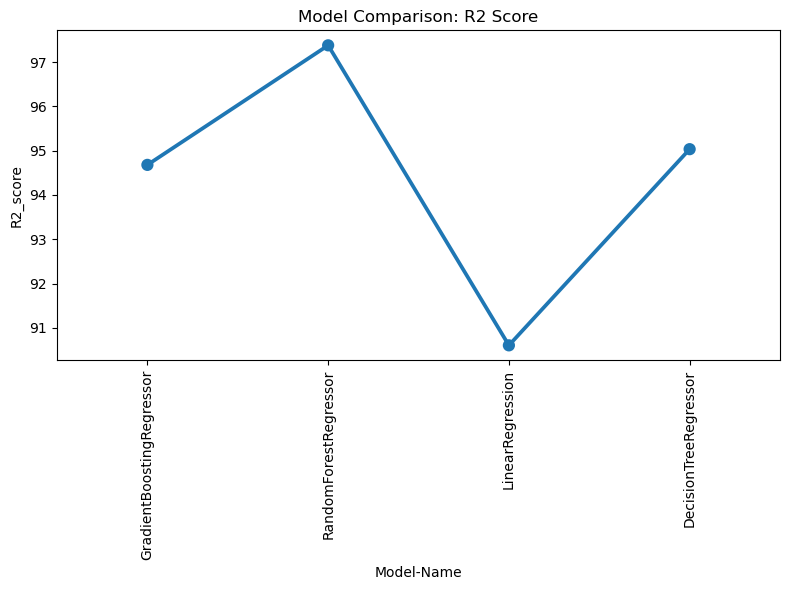

In [56]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='R2_score',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()

In [57]:
#here we see that the best model is random forest regressor we can be using that for our model purposes

In [58]:
#we will do some hyperparameter tuning and making changes so as to observe improvement in accuracy, if any

In [59]:
model_name=[]
r2score=[]
rmse=[]

parameter_gb = {
    'n_estimators': 10,  # Number of boosting stages
    'max_depth': 8,  # Maximum depth of individual trees
    'min_samples_split':10 ,  # Minimum samples required to split a node
    'min_samples_leaf': 2,# Minimum samples required at each leaf node
    'random_state':50
}

parameter_rf = {
    "n_estimators": 10,  # Number of trees in the forest
    "max_depth": 8,  # Maximum depth of each tree
    "min_samples_split": 10,  # Minimum samples required to split a node
    "min_samples_leaf": 2,  # Minimum samples required at each leaf node
    "max_features": "log2" , # Number of features considered at each split
    "random_state":50    
}


parameter_dt = {
    "criterion": "squared_error",  # Function to measure the quality of a split
    "max_depth": 10,  # Maximum depth of the tree
    "min_samples_split": 7,  # Minimum samples required to split a node
    "min_samples_leaf": 2,  # Minimum samples required at each leaf node
    "max_features": "log2",  # Number of features considered at each split
    "random_state":50  
}
models=[
    GradientBoostingRegressor(**parameter_gb),
    RandomForestRegressor(**parameter_rf),
    LinearRegression(),
    DecisionTreeRegressor(**parameter_dt),
]



for model in models:
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    model_name.append(model.__class__.__name__)
    r2score.append(str(r2_score( y_test , y_pred ) * 100 ))
    rmse.append(str(mean_squared_error( y_test , y_pred,squared=False )))

In [60]:
models_df = pd.DataFrame({"Model-Name":model_name, "R2_score": r2score ,'RMSE':rmse})
models_df = models_df.astype({"R2_score": float, "RMSE": float})
models_df.sort_values("R2_score", ascending = False)

,Model-Name,R2_score,RMSE
3,DecisionTreeRegressor,95.203582,288.689532
1,RandomForestRegressor,94.953758,296.112391
2,LinearRegression,90.605069,404.035323
0,GradientBoostingRegressor,84.389784,520.807213


In [61]:
#we still see Random Forest fregressor with an tuning is giving a best accuracy

In [62]:
#saving the model

In [63]:
final_model=RandomForestRegressor(random_state=42)
final_model.fit(x_train , y_train)

RandomForestRegressor(random_state=42)

In [64]:
joblib.dump(final_model,"power_prediction.pkl")

['power_prediction.pkl']

In [65]:
#some more visualisations

In [66]:
date_col=['Week','Month','Seasons','Hour','Day']
num_col=['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)']

array([[<Axes: title={'center': 'Wind Speed (m/s)'}>,
        <Axes: title={'center': 'Theoretical_Power_Curve (KWh)'}>]],
      dtype=object)

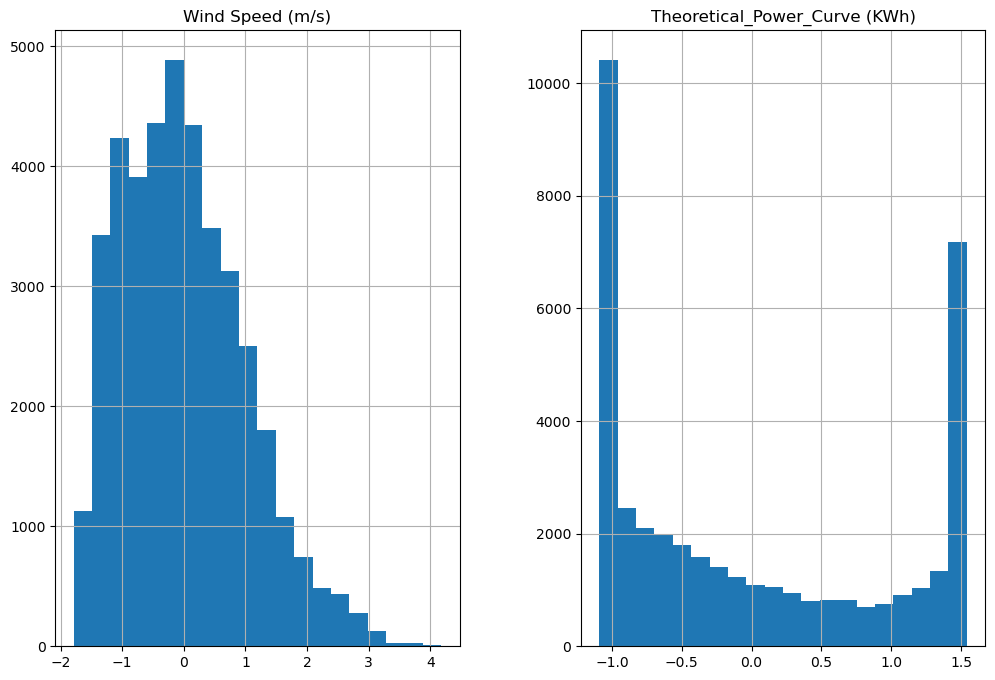

In [67]:
x_train[num_col].hist(bins=20,figsize=(12,8))  

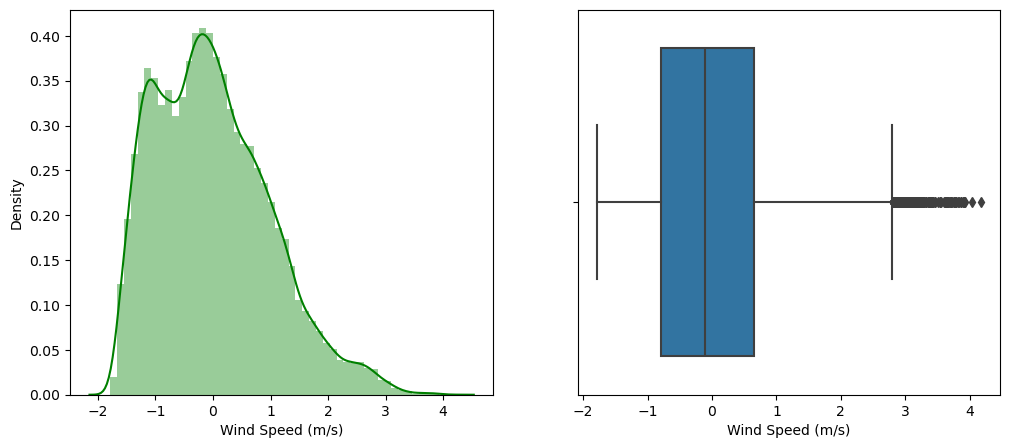

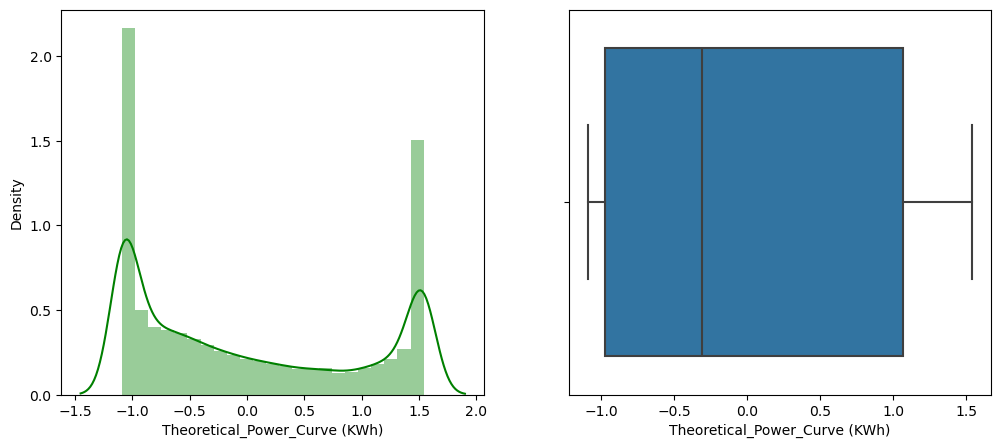

In [68]:
#univariate analysis
for col in num_col:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.distplot(x_train[col], ax=ax[0] ,color='green')  
    sns.boxplot(x=x_train[col], ax=ax[1])
    plt.show()

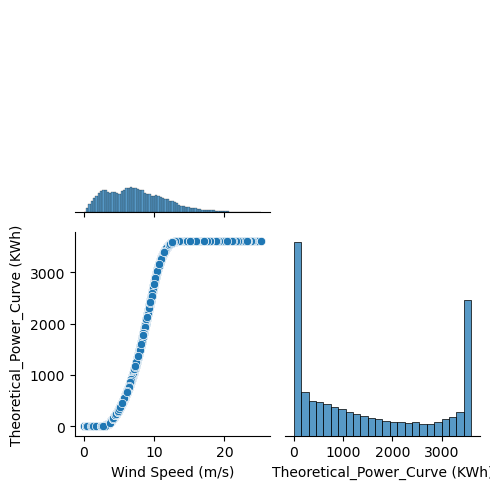

In [69]:
# bivariate analysis
sns.pairplot(data[num_col], corner=True)  
sns.boxplot(x=x_train[col], ax=ax[1])
plt.tight_layout()
plt.show()

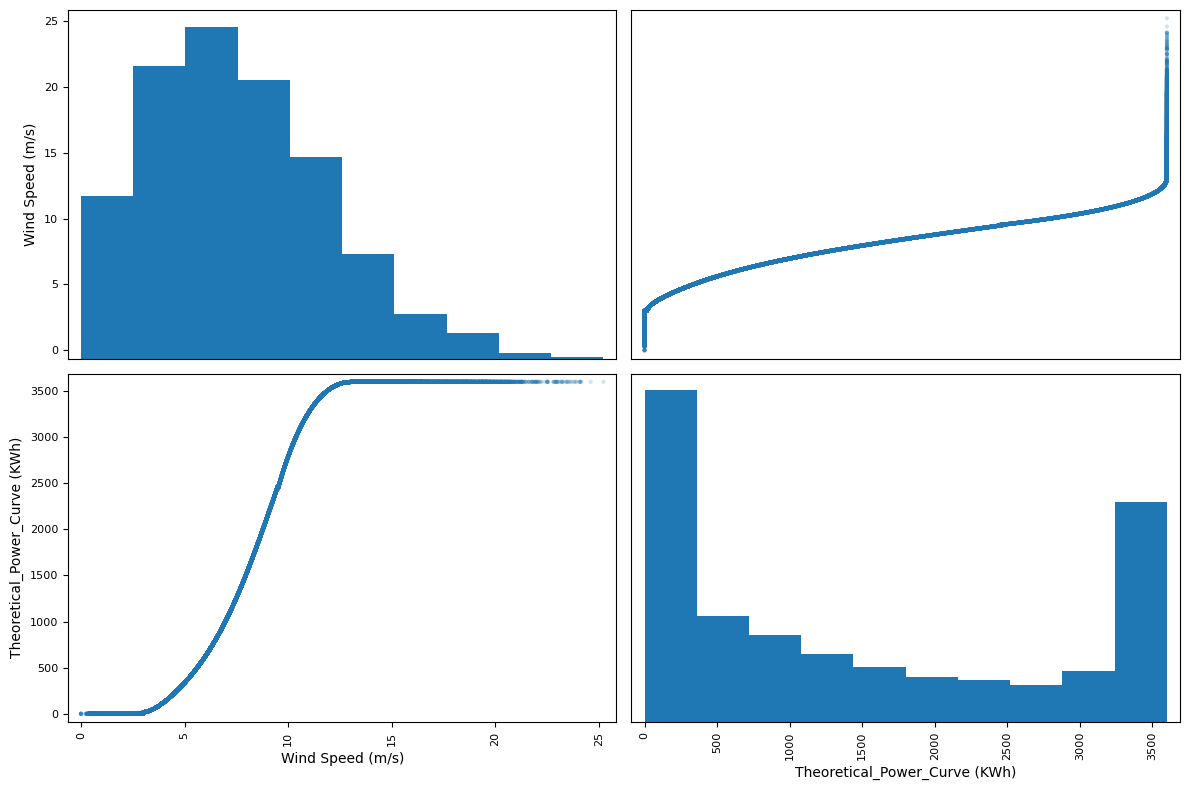

In [70]:
#multivariate analysis
pd.plotting.scatter_matrix(data[num_col], alpha=0.2, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [71]:
import pickle

In [72]:
pickle.dump(scale,open("sc.pkl",'wb'))

In [73]:
pickle.dump(final_model,open("power_prediction.pkl",'wb'))